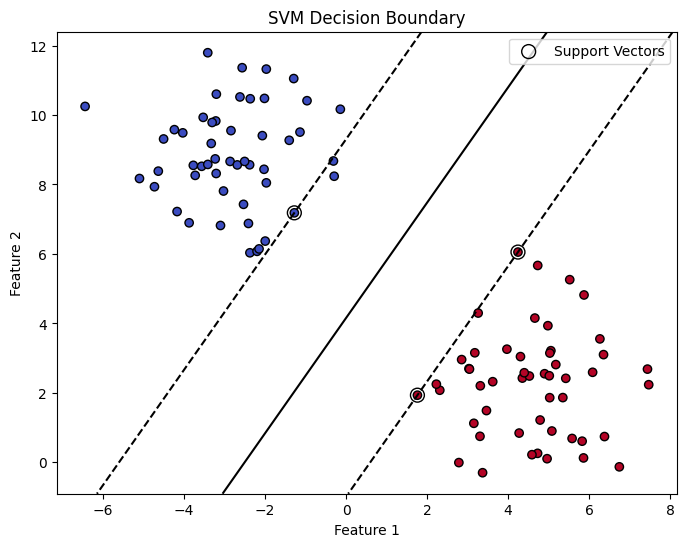

Model Accuracy: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset with 2 classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Create grid to plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, edgecolors='black', facecolors='none', label="Support Vectors")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, y, svm_model)

# Evaluate model accuracy
accuracy = svm_model.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")
